In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [2]:
data = load_breast_cancer()

In [3]:
#Features and target
X = data.data
y = data.target

In [9]:
#Convert to dataframe for easier exploration
features = data.feature_names
df = pd.DataFrame(X,columns=features)
df['target'] = y

In [10]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
#Dataset info
print("\nTarget names:" ,data.target_names)
print("Feature names:",data.feature_names)
print("Shape of dataset:",df.shape)


Target names: ['malignant' 'benign']
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Shape of dataset: (569, 31)


In [11]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled,columns=features)

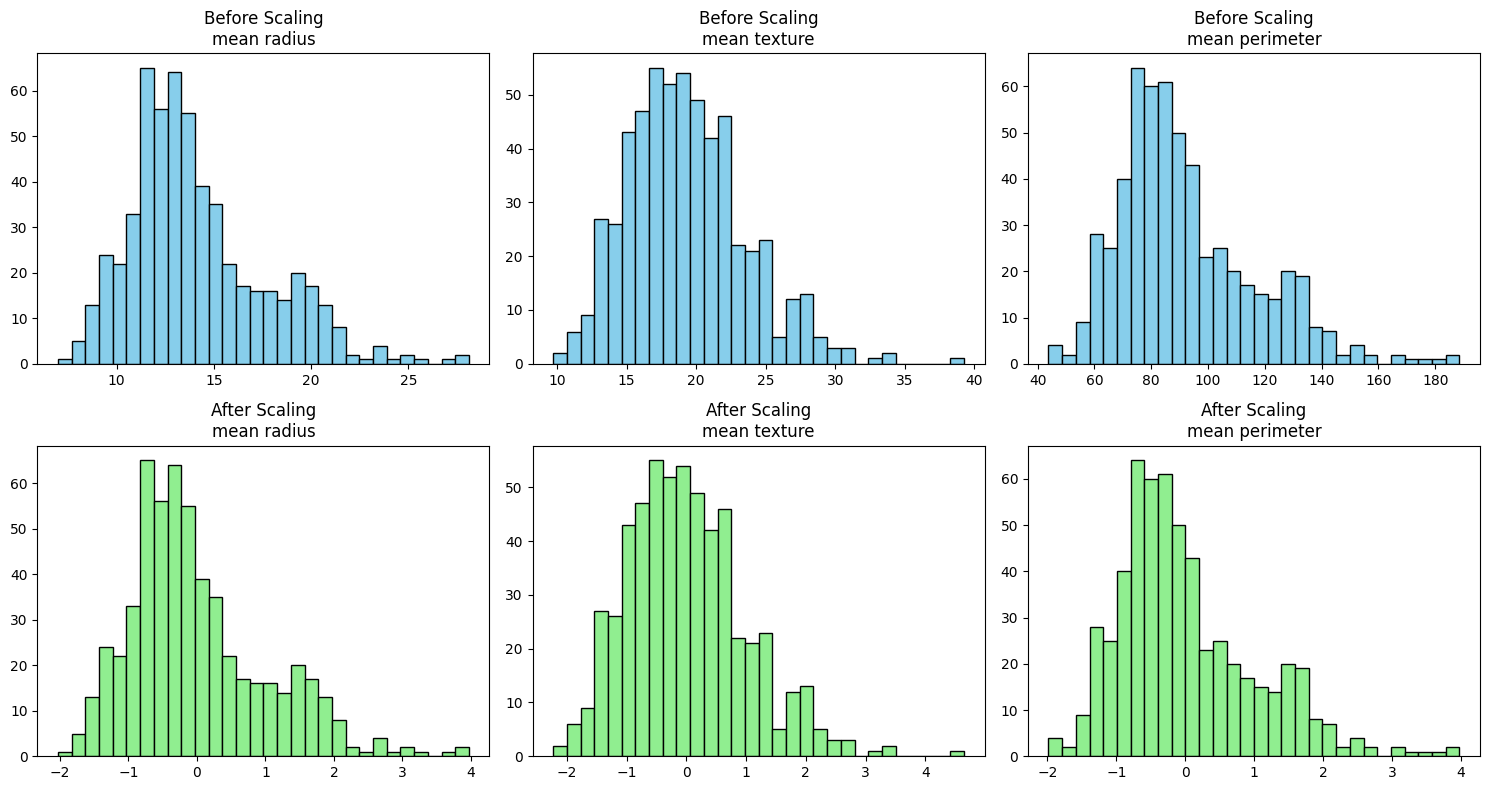

In [13]:
#plot berfore and after scaling for a new features
fig, axes = plt.subplots(2,3,figsize=(15,8))
for i, feature in enumerate(features[:3]): # pick first 3 features for visualization   # Before scaling
    axes[0,i].hist(df[feature],bins=30,color="skyblue",edgecolor="black")
    axes[0, i].set_title((f"Before Scaling\n{feature}"))
    # After scaling
    axes[1, i].hist(df_scaled[feature], bins=30, color="lightgreen", edgecolor="black")
    axes[1, i].set_title(f"After Scaling\n{feature}")

plt.tight_layout()
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

In [16]:
# 2. تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN" : KNeighborsClassifier(n_neighbors=5)
}

=== Logistic Regression ===
              precision    recall  f1-score   support

   malignant       0.91      0.95      0.93        42
      benign       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

------------------------------------------------------------


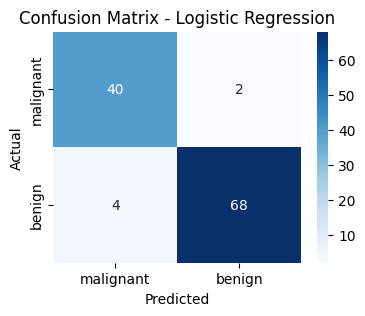

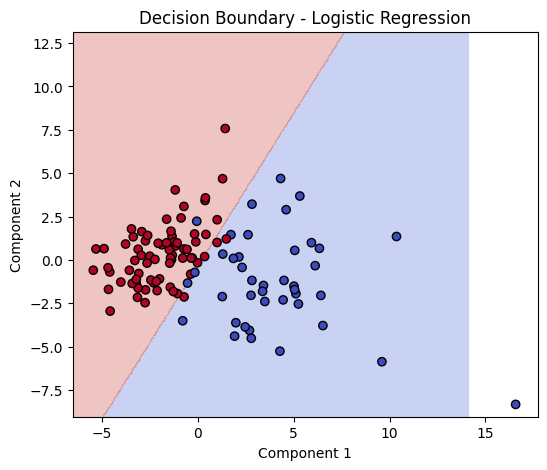

=== Decision Tree ===
              precision    recall  f1-score   support

   malignant       0.93      0.90      0.92        42
      benign       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

------------------------------------------------------------


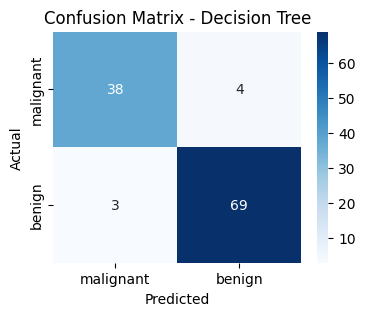

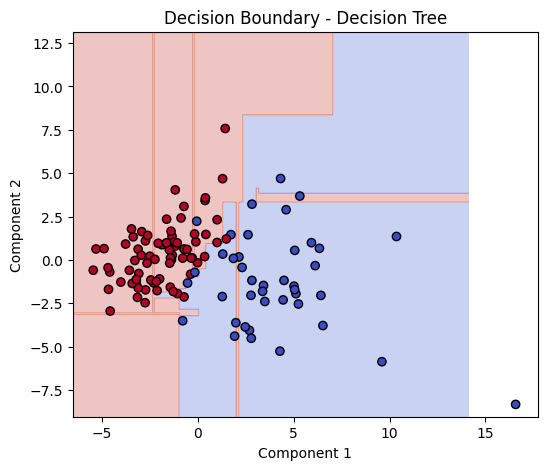

=== Random Forest ===
              precision    recall  f1-score   support

   malignant       0.88      0.90      0.89        42
      benign       0.94      0.93      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

------------------------------------------------------------


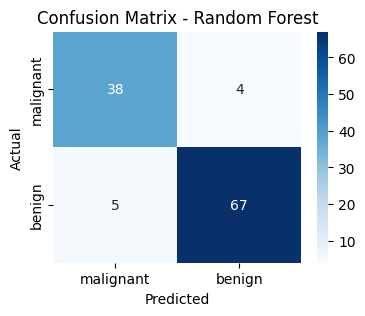

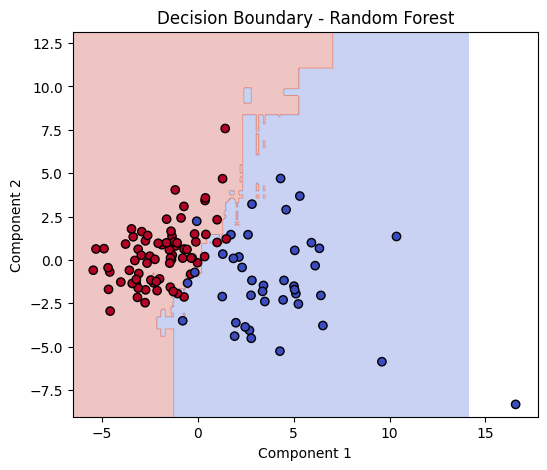

=== Naive Bayes ===
              precision    recall  f1-score   support

   malignant       0.88      0.88      0.88        42
      benign       0.93      0.93      0.93        72

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

------------------------------------------------------------


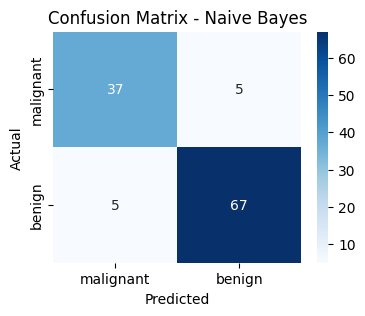

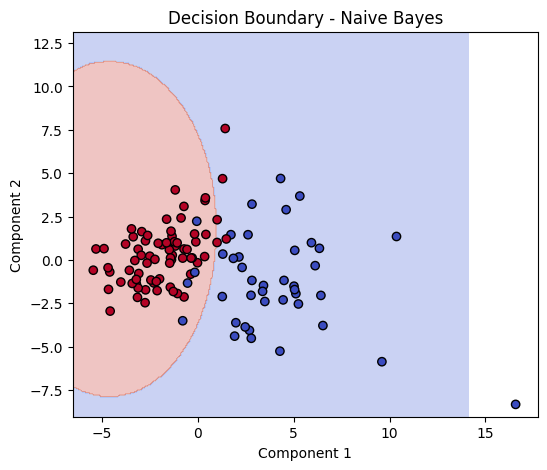

=== KNN ===
              precision    recall  f1-score   support

   malignant       0.88      0.90      0.89        42
      benign       0.94      0.93      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

------------------------------------------------------------


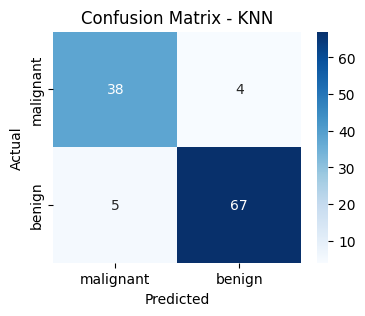

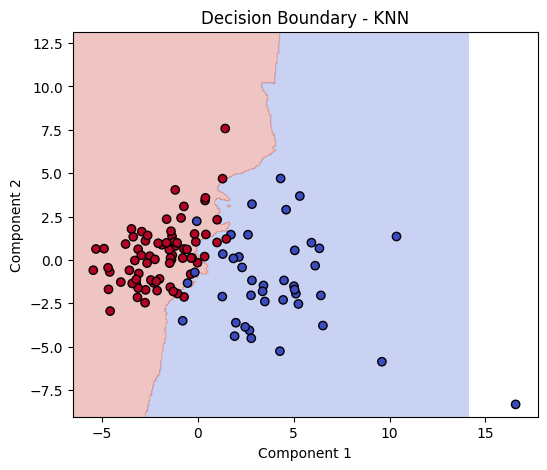

In [55]:
results = {}

for name, model in models.items():
    if name in ["Logistic Regression", "KNN"]:
        X_tr, X_te = X_train_scaled, X_test_scaled
        if X_tr.shape[1] > 2:
            pca = PCA(n_components=2)
            X_tr_2d = pca.fit_transform(X_tr)
            X_te_2d = pca.transform(X_te)
        else:
            X_tr_2d, X_te_2d = X_tr, X_te
    else:
        X_tr_2d, X_te_2d = X_train_2d, X_test_2d

    model.fit(X_tr_2d, y_train)
    y_pred = model.predict(X_te_2d)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=data.target_names))
    print("-"*60)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=data.target_names,
                yticklabels=data.target_names)
    plt.title(f"Confusion Matrix - {name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

    #Decision Boundary
    x_min, x_max = X_tr_2d[:,0].min() - 1, X_tr_2d[:,0].max() + 1
    y_min, y_max = X_tr_2d[:,1].min() - 1, X_tr_2d[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X_te_2d[:, 0], X_te_2d[:, 1], c=y_test, edgecolor="k", cmap=plt.cm.coolwarm)
    plt.title(f"Decision Boundary - {name}")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

In [52]:
# import pandas as pd

# # DataFrame لتجميع التوقعات
# preds_df = pd.DataFrame({"Actual": y_test})

# for name, model in models.items():
#     preds_df[name] = model.predict(X_test)

# print(preds_df.head(15))  # عرض أول 15 صف

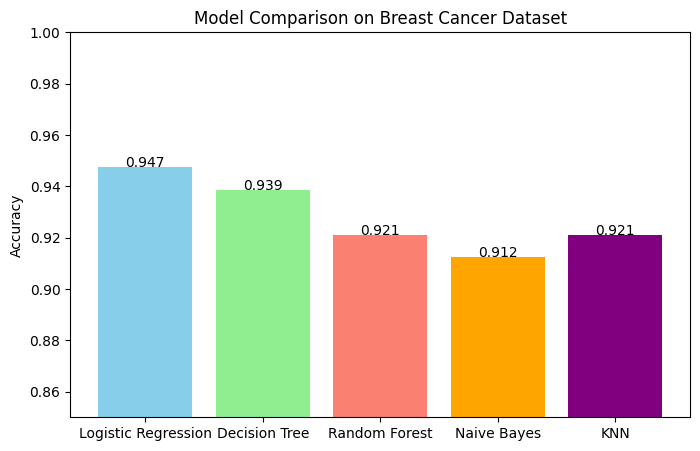

In [56]:
# 5. رسم النتائج
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=["skyblue","lightgreen","salmon","orange","purple"])
plt.ylabel("Accuracy")
plt.title("Model Comparison on Breast Cancer Dataset")
plt.ylim(0.85, 1.0)
for i, (name, acc) in enumerate(results.items()):
    plt.text(i, acc, f"{acc:.3f}", ha="center", fontsize=10)
plt.show()